Exercise 1

So we are given 5 predictors namely GPA, IQ, Gender, interaction b/w GPA and IQ, interaction b/w GPA and Gender (1 for F , 0 for M) . So, at first I didn't know what exactly interaction meant, so upon some reading I found out that it's just the multiplication of the 2 predictors. 

The regression equation : y= 50+ 20*GPA +0.07*IQ + 35*Gender + 0.01*GPA*IQ - 10*GPA*Gender

Q1)
for fixed IQ and GPA, 
for females : y1= 50 +20*GPA + 0.07*IQ + 35 + 0.01*GPA*IQ - 10*GPA = 85 + 10*GPA +0.07*IQ + 0.01*GPA*IQ
for males : y2= 50 + 20*GPA + 0.07*IQ +0.01*GPA*IQ

for y1>y2 : 
85 + 10*GPA > 50 + 20*GPA
3.5 > GPA : so if GPA of a female is less than 3.5, she earns more on avg than males
GPA > 3.5 : if GPA of a male is more than 3.5 , he earns more on avg than females

so the correct answer is c : For a fixed value of IQ and GPA, males earn more on average than females provided that the GPA is high enough.

Q2) y for female , IQ=110, GPA=4

y= 85 + 40 + 7.7 + 4.4 = 137.1
so predicted salary = 137.1*1000 = 137,100 dollars

Q3) 
This is clearly false. Even considering an average IQ of 100 and an average GPA of 3.0 , the interaction term is signifying that an individual can earn an extra 0.01*3*100 = 3000 dollars. So , just because the coefficient is small , we should not neglect the interaction without looking at the values the predictors, whose interaction is being considered, can possibly take.



                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Wed, 24 Dec 2025   Prob (F-statistic):           7.03e-81
Time:                        21:51:38   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

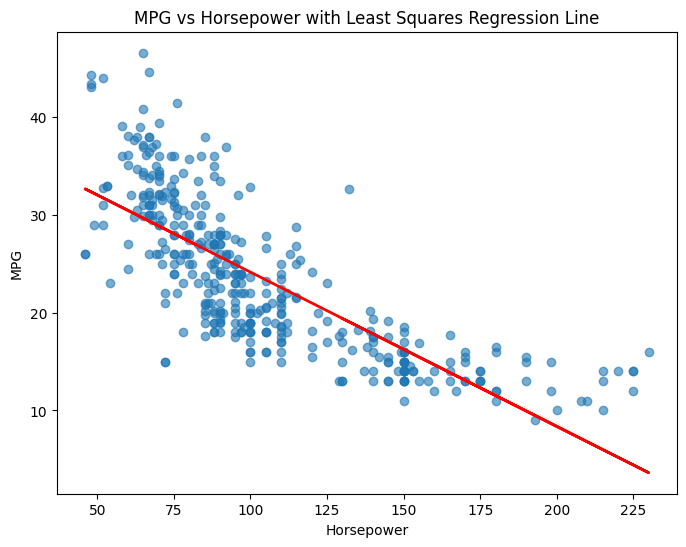

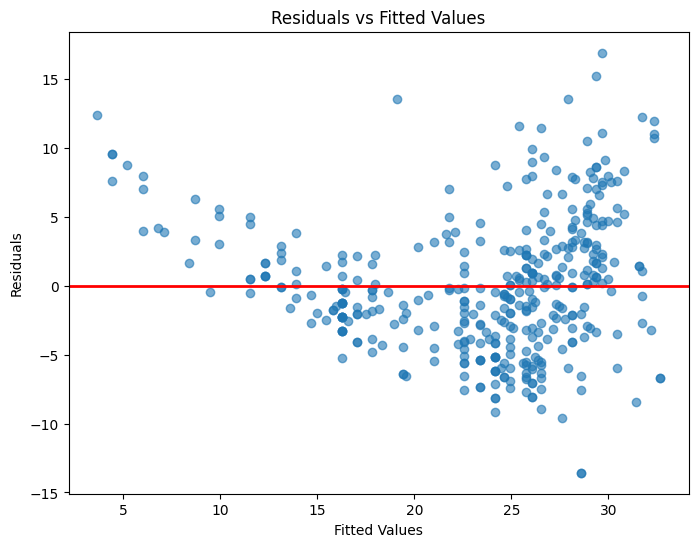

In [16]:
#Question 2

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

auto = pd.read_csv("Auto.csv")

auto = auto.replace('?', np.nan)
auto['horsepower'] = pd.to_numeric(auto['horsepower'])
auto = auto.dropna()


X = auto['horsepower']
y = auto['mpg']

X = sm.add_constant(X)  # add intercept
model = sm.OLS(y, X).fit()

print(model.summary())


new_X = pd.DataFrame({'const': [1], 'horsepower': [98]})
prediction = model.get_prediction(new_X)
print("\nPrediction for horsepower = 98")
print(prediction.summary_frame(alpha=0.05))


plt.figure(figsize=(8, 6))
plt.scatter(auto['horsepower'], auto['mpg'], alpha=0.6)
plt.plot(auto['horsepower'], model.predict(X), color='red', linewidth=2)
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("MPG vs Horsepower with Least Squares Regression Line")
plt.show()


fitted_vals = model.fittedvalues
residuals = model.resid

plt.figure(figsize=(8, 6))
plt.scatter(fitted_vals, residuals, alpha=0.6)
plt.axhline(0, color='red', linewidth=2)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()

Question 2 Analysis
The value of R^2 is only 0.606, indicating that the regression model is not a very good fit for the given data. Also , looking at the scatter plot, I think polynomial regression ( adding x^2, x^3, etc terms to the regression equation) would be a better fit here due to the curved bunching nature of the data points , so feature engineering would improve the fit and hence R^2.

for horsepower=98, the predicted mpg is 24.467077 (with standard error 0.251262) and the 95% confidence interval is (23.973079, 24.961075) and the prediction interval is (14.809396,34.124758).

Also, for a good regression fit , the errors should be normaly distributed ( randomly scattered ) with no inherent pattern, i.e., they should be unpredictable. From the residue plot above, it is clear than there is some curve visible along which most of the residues more or less seem to gather around , so again the model is not a good fit for the given data.

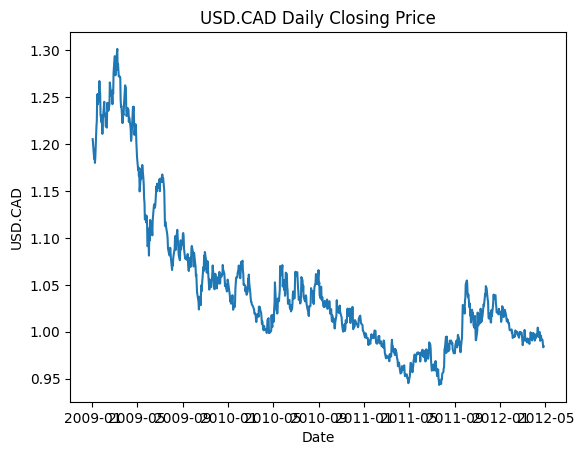

ADF Statistic: -1.8632077855749665
p-value: 0.349562249125575
90% Critical Value: -2.5685626352082207
Lambda : -0.007345020246172719
Half-life in days : 94.36967596122346


C:\Users\adity\AppData\Local\Temp\ipykernel_27888\4177772956.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lambda_hat = model.params[1]


In [17]:
#Exercise 3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

audusd = pd.read_csv("inputData_AUDUSD_20120426.csv")
audcad = pd.read_csv("inputData_AUDCAD_20120426.csv")

# USD.CAD = AUD.CAD / AUD.USD
df = pd.merge(audusd, audcad, on="Date", suffixes=("_AUDUSD", "_AUDCAD"))

df["USDCAD"] = df["Close_AUDCAD"] / df["Close_AUDUSD"]

df["Date"] = pd.to_datetime(df["Date"], format="%Y%m%d")
df.set_index("Date", inplace=True)

plt.plot(df.index, df["USDCAD"])
plt.title("USD.CAD Daily Closing Price")
plt.xlabel("Date")
plt.ylabel("USD.CAD")
plt.show()

log_price = np.log(df["USDCAD"]) #natural log

adf_result = adfuller(log_price, maxlag=1, regression="c")

print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("90% Critical Value:", adf_result[4]["10%"])

lagged_y = log_price.shift(1).dropna()
delta_y = delta_y.loc[lagged_y.index]

X = sm.add_constant(lagged_y)
model = sm.OLS(delta_y, X).fit()

lambda_hat = model.params[1]
half_life = -np.log(2) / lambda_hat

print("Lambda :", lambda_hat)
print("Half-life in days :", half_life)


Exercise 3 Analytical Questions
Looking at the plot , this time series is not stationary as the mean is not constant, so this plot looks like a random walk. As it is not stationary , it does not have a clear mean.
As printed above , the t-statistic is -1.86, the p-value is 0.34 and the critical value at 90% confidence is -2.56.
Since the t-statistic is greater than the critical value , we fail to reject the null hypothesis (unit root), so the given time series is not stationary.
From the results above, we see that the half life of this "non-stationary" time series is around 94.3 days. First of all, half life does not make any sense for non stationary time series' as there is no fixed mean we calculate the deviation from. A half life of 94.3 days means that a trader would expect the USD.CAD closing value to deviate from the mean (no particular mean in this case , as it is non stationary) by only half of what it deviates from today. For a short term trader , this is something not worth thier time at all as they generally hold stocks only for a few hours/days and not months, so extremely slow mean reversion is not beneficial for short term traders.

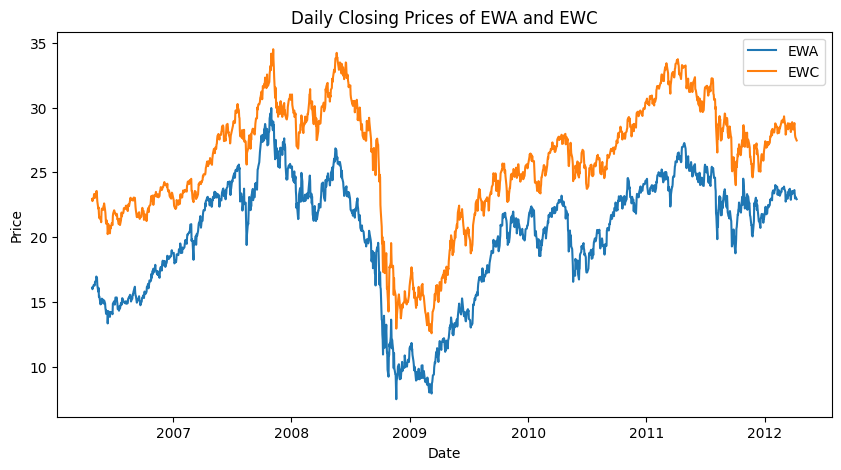

Correlation coefficient: 0.9575
Hedge Ratio (β): 0.9527

ADF Test Results
ADF Statistic       : -1.2910
Critical Value (95%): -1.9412
p-value             : 0.1816
Conclusion: Spread is not stationary

Half-life of mean reversion: 27.95 days


In [18]:
#Question 4
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

df = pd.read_csv("inputData_EWA_EWC.csv", parse_dates=["Date"])
df.set_index("Date", inplace=True)

ewa = df["EWA"]
ewc = df["EWC"]

plt.figure(figsize=(10, 5))
plt.plot(ewa, label="EWA")
plt.plot(ewc, label="EWC")
plt.title("Daily Closing Prices of EWA and EWC")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

correlation = ewa.corr(ewc)
print(f"Correlation coefficient: {correlation:.4f}")

X = sm.add_constant(ewc)
ols_model = sm.OLS(ewa, X).fit()
beta = ols_model.params.iloc[1]

print(f"Hedge Ratio (β): {beta:.4f}")

spread = ewa - beta * ewc

adf_stat, p_value, _, _, crit_vals, _ = adfuller(
    spread,
    maxlag=1,
    regression="n"
)

critical_value_95 = crit_vals["5%"]

print("\nADF Test Results")
print(f"ADF Statistic       : {adf_stat:.4f}")
print(f"Critical Value (95%): {critical_value_95:.4f}")
print(f"p-value             : {p_value:.4f}")

if adf_stat < critical_value_95:
    print("Conclusion: Spread is stationary")
else:
    print("Conclusion: Spread is not stationary")

spread_lag = spread.shift(1).dropna()
delta_spread = spread.diff().dropna()

hl_model = sm.OLS(delta_spread, sm.add_constant(spread_lag)).fit()
half_life = -np.log(2) / hl_model.params.iloc[1]

print(f"\nHalf-life of mean reversion: {half_life:.2f} days")


Question 4 Comments

Personally my favourite question of the assignment , got to learn a lot about pairs trading from this question and further reading so thanks for that :)

